In [1]:
from PySDM import Builder
from PySDM.backends import CPU
from PySDM.physics import si
from PySDM.environments import Box
from PySDM.dynamics import Displacement
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
volumes = np.linspace(.01 * si.um**3, 1 * si.um**3, num=100)

In [3]:
builder = Builder(n_sd=100, backend=CPU())
builder.set_environment(Box(dt=np.nan, dv=np.nan))
builder.add_dynamic(Displacement())
particulator = builder.build(attributes={'n': np.ones_like(volumes), 'volume': volumes})

In [4]:
v_term = particulator.attributes['terminal velocity'].to_ndarray()

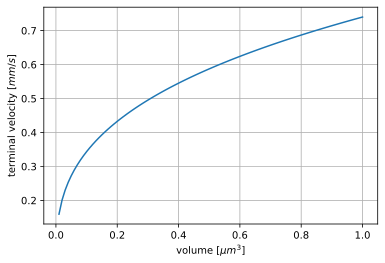

HTML(value="<a href='./terminal_velocities.pdf' target='_blank'>./terminal_velocities.pdf</a><br>")

In [6]:
pyplot.plot(volumes / si.um**3, v_term / (si.mm / si.s))
pyplot.xlabel(r'volume [$\mu m^3$]')
pyplot.ylabel(r'terminal velocity [$mm/s$]')
pyplot.grid()
show_plot('terminal_velocities.pdf')